In [1]:
import numpy as np
import scipy as sc
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from datetime import datetime, date
import calendar
from time import ctime

Here we use Km as unit of distance and second as unit of time

In [2]:
#initia Conditions

Rs= 20              #in unit of solar radius
R0 = Rs*695700      # unit is Km
v0=1000            # unit is km/s
w=400              # which is ambient solar wind speed in unit of km/s 
Gamma=0.2
gamma=Gamma*10**(-7)  # unit is km-1
Time_UTC=datetime(2020,8,7,10,15,0)    #input utc time in format (year,month,date,hr,minute,second)

# Approch-2

In [3]:
def dbm(x,t):
    r,v=x
    dxdt=[v,-gamma*(v-w)*np.abs(v-w)]
    return dxdt

ts = calendar.timegm(Time_UTC.timetuple())  #this command provide second correspond to given input time
t=np.arange(ts,ts+388000,1)

In [4]:
#we calculate speed and distance at alpha angle
def RV_alpha(omega,alpha):
    omega=np.deg2rad(omega)
    alpha=np.deg2rad(alpha)
    R0a=R0 *(np.cos(alpha) +((np.tan(omega))**2 - (np.sin(alpha))**2)**0.5)/(1+ np.tan(omega))
    V0a= v0 *(np.cos(alpha) +((np.tan(omega))**2 - (np.sin(alpha))**2)**0.5)/(1+ np.tan(omega))
    Y0=[R0a,V0a]
    Y=odeint(dbm,Y0,t)
    R=Y[:,0]/695700             # from now onwards we take solar radius as unit of distance
    V=Y[:,1]
    return R,V;
    


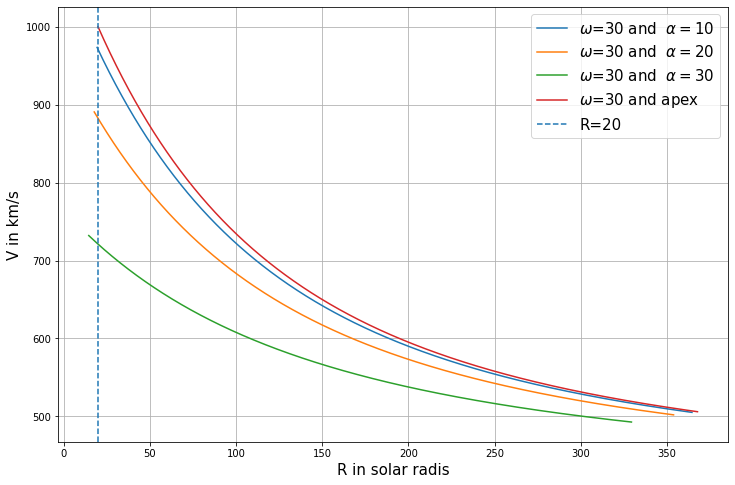

In [5]:
plt.figure(figsize=(12,8))
plt.plot(RV_alpha(30,10)[0],RV_alpha(30,10)[1],label=r"$\omega$=30 and  $\alpha=10$")
plt.plot(RV_alpha(30,20)[0],RV_alpha(30,20)[1],label=r"$\omega$=30 and  $\alpha=20$")
plt.plot(RV_alpha(30,30)[0],RV_alpha(30,30)[1],label=r"$\omega$=30 and  $\alpha=30$")
plt.plot(RV_alpha(30,0)[0],RV_alpha(30,0)[1],label=r"$\omega$=30 and apex")
plt.axvline(x=20,linestyle="dashed",label="R=20")
plt.xlabel("R in solar radis",fontsize=15)
plt.ylabel("V in km/s",fontsize=15)
plt.legend(fontsize=15)
plt.grid()


Text(0, 0.5, 'R (R_sun)')

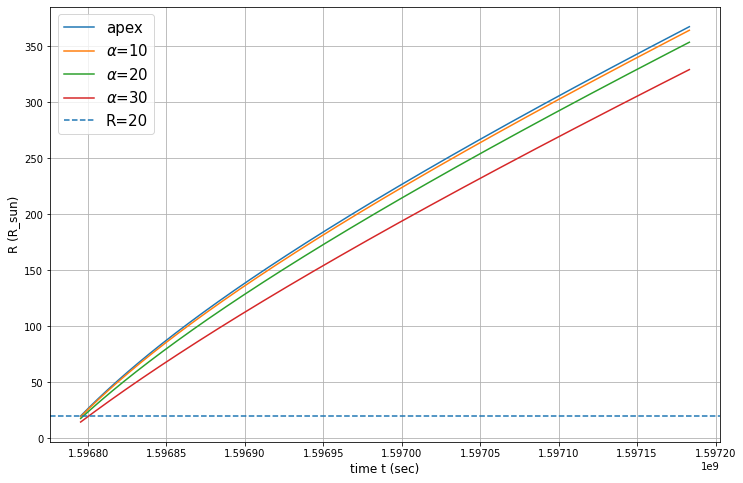

In [6]:

plt.figure(figsize=(12,8))
plt.plot(t,RV_alpha(30,0)[0],label="apex")
plt.plot(t,RV_alpha(30,10)[0],label=r"$\alpha$=10")
plt.plot(t,RV_alpha(30,20)[0],label=r"$\alpha$=20")
plt.plot(t,RV_alpha(30,30)[0],label=r"$\alpha$=30")
plt.axhline(y=20,linestyle="dashed",label="R=20")
plt.legend(fontsize=15)
plt.grid()
plt.xlabel("time t (sec)",fontsize=12)
plt.ylabel("R (R_sun)",fontsize=12)

# Trial

In [7]:
Rt,Vt=np.loadtxt("2.dat",delimiter="  ",unpack=True)
R1=RV_alpha(30,30)[0]
V1=RV_alpha(30,30)[1]
#R2=R_alpha(10,0)
#V2=V_alpha(10,0)
#R3=R_alpha(20,0)
#V3=V_alpha(20,0)
len(V1)


388000

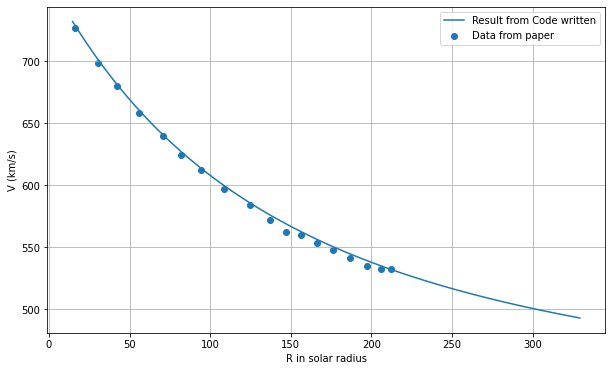

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(Rt,Vt,label="Data from paper")
plt.plot(R1,V1,label="Result from Code written")
#plt.plot(R2,V2)
#plt.plot(R3,V3)
plt.legend()
plt.xlabel("R in solar radius")
plt.ylabel("V (km/s)")
plt.grid()

# Comparison with webtool

In [9]:
Rd,Vd=np.loadtxt("webtool.dat",delimiter="  ",unpack=True)
R2=RV_alpha(30,0)[0]/215
V2=RV_alpha(30,0)[1]


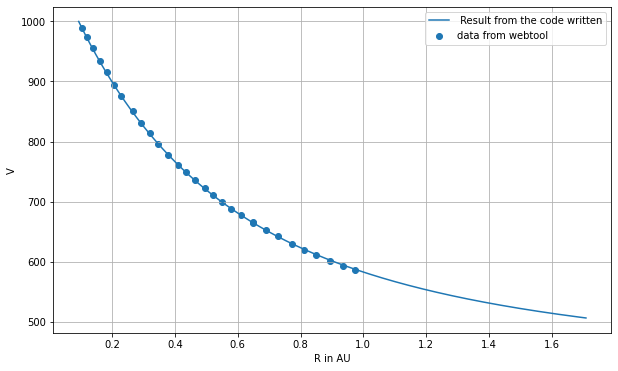

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(Rd,Vd,label="data from webtool")
plt.plot(R2,V2, label=" Result from the code written")
plt.grid()
plt.legend()
plt.xlabel("R in AU")
plt.ylabel("V")
plt.savefig("dbmcomparision2.png")

In [11]:
def find_nearest(d,v, value):
    array = np.asarray(d)
    idx = (np.abs(array - value)).argmin()
    v=v[idx]
    T=(t[idx]-t[0])/3600
    T_Utc=datetime.utcfromtimestamp(t[idx])
    return T,v,T_Utc

A=find_nearest(R2,V2,1.0000000000)

print("Transit time of CME is " +str(A[0]) + " hr")
print("Imapact speed of CME at 1 Au is " +str(A[1]) +" Km/s")
print("Arrival time of CME in UTC is " +str(A[2]))

print("\nwhile value of T and V from webtool is 52.87 hr and 583 km/s respectively and CME arrival time is 2020-08-09 15h:06 min ")

Transit time of CME is 52.90611111111111 hr
Imapact speed of CME at 1 Au is 582.6181477338234 Km/s
Arrival time of CME in UTC is 2020-08-09 15:09:22

while value of T and V from webtool is 52.87 hr and 583 km/s respectively and CME arrival time is 2020-08-09 15h:06 min 
